# 🧹 Gender Inequality in Unpaid Domestic and Care Work
## A Global Look at How Time Is Divided Between Genders
By Onika Sharma


Unpaid Work: The Hidden Load

Every day, millions of women spend hours cooking, cleaning, and caring for others—without pay.
Globally, women do 3x more unpaid work than men.
This invisible labor limits their time, income, and opportunities—fueling gender inequality.

The time women spend on unpaid work keeps them out of school, jobs, and positions of power—deepening gender inequality.

Using World Bank data, this dashboard highlights how the unpaid work gap varies across countries and years.

In [11]:
import pandas as pd

df = pd.read_csv(r"D:\proportion-of-time-spent-on-unpaid-domestic-and-care-work-of-24-hour-day\Proportion of time spent on unpaid domestic and care work (% of 24 hour day).csv")
df.head()


,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Albania,ALB,2011,21.736,female
1,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Algeria,DZA,2012,21.667,female
2,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Argentina,ARG,2013,23.419,female
3,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Argentina,ARG,2010,17.500,female
4,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Argentina,ARG,2005,16.736,female


In [9]:
# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing values
df = df.dropna(subset=["Value", "Country Name", "Year", "Disaggregation"])

# Convert year to integer
df["Year"] = df["Year"].astype(int)

# Pivot to get male vs female comparison per country-year
pivot_df = df.pivot_table(index=["Country Name", "Year"], 
                          columns="Disaggregation", values="Value").reset_index()

pivot_df.columns.name = None  # remove MultiIndex
pivot_df = pivot_df.rename(columns={"female": "Female", "male": "Male"})
pivot_df.head()


,Country Name,Year,Female,Male
0,Albania,2011,21.736,3.472
1,Algeria,2012,21.667,3.750
2,Argentina,2005,16.736,6.111
3,Argentina,2010,17.500,6.597
4,Argentina,2013,23.419,9.249


In [13]:
# adding a gender gap column
pivot_df["Gap (Female - Male)"] = pivot_df["Female"] - pivot_df["Male"]
pivot_df["Female"] - pivot_df["Male"]

0      18.264
1      17.917
2      10.625
3      10.903
4      14.170
        ...  
180     5.000
181    15.486
182    11.498
183    19.931
184    17.153
Length: 185, dtype: float64

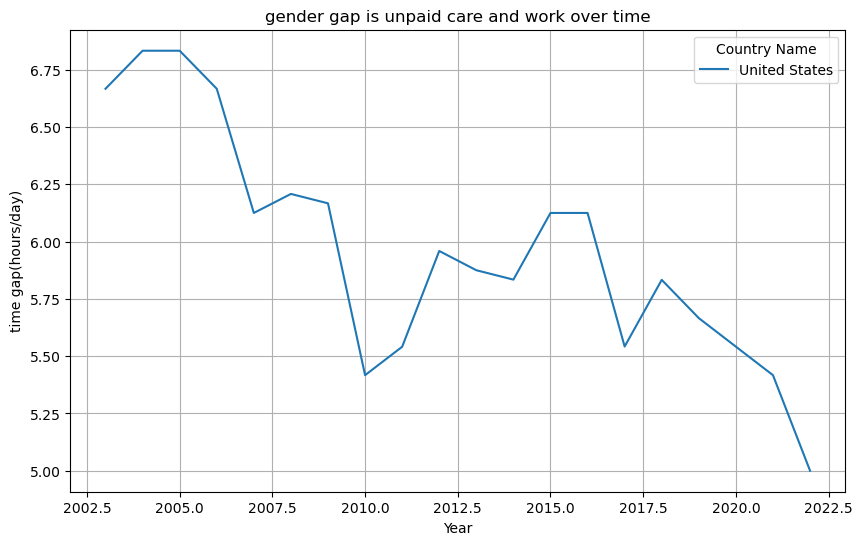

In [54]:
# time trend 
import seaborn as sns
import matplotlib.pyplot as plt
selected = pivot_df[pivot_df["Country Name"].isin(["United States"])]

plt.figure(figsize=(10 , 6))
sns.lineplot(data=selected , x="Year" , y="Gap (Female - Male)" , hue = "Country Name")
plt.title("gender gap is unpaid care and work over time")
plt.ylabel("time gap(hours/day)")
plt.grid(True)
plt.show()

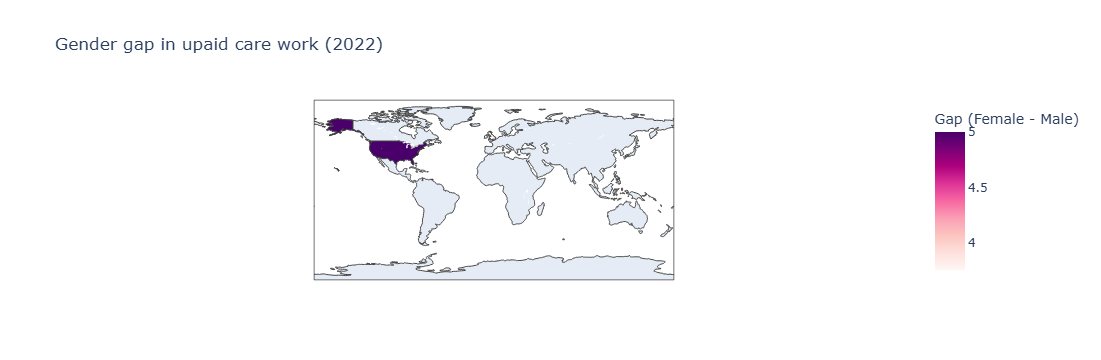

In [66]:
import plotly.express as px
latest_year = pivot_df["Year"].max()
latest_data = pivot_df[pivot_df["Year"] == latest_year]
fig = px.choropleth(latest_data,locations="Country Name",locationmode="country names",color="Gap (Female - Male)",color_continuous_scale="RdPu",title=f"Gender gap in upaid care work ({latest_year})")
fig.show()

In [74]:
import pandas as pd
contextual_df = pd.read_csv(r"D:\proportion-of-time-spent-on-unpaid-domestic-and-care-work-of-24-hour-day\Contextual Indicators.csv")
df

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Albania,ALB,2011,21.736,female
1,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Algeria,DZA,2012,21.667,female
2,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Argentina,ARG,2013,23.419,female
3,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Argentina,ARG,2010,17.500,female
4,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.FE,Argentina,ARG,2005,16.736,female
...,...,...,...,...,...,...,...
365,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.MA,United States,USA,2003,9.875,male
366,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.MA,Uruguay,URY,2013,8.377,male
367,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.MA,Uruguay,URY,2007,9.722,male
368,Proportion of time spent on unpaid domestic an...,SG.TIM.UWRK.MA,West Bank and Gaza,PSE,2013,2.986,male


In [88]:
contextual_df[["Indicator Name", "Indicator Code"]].drop_duplicates().reset_index(drop=True)


,Indicator Name,Indicator Code
0,Reason for not having a mobile money account: ...,fin13.1c.s
1,Reason for not using their inactive account: n...,fin10.1b.s
2,Made a digital in-store merchant payment for t...,fin14.2
3,Reason for not having a mobile money account: ...,fin13.1e
4,Reason for not having a mobile money account: ...,fin13.1d
...,...,...
77,Can use account at a bank or financial institu...,fin11.1
78,Location of cooking: separate building (% of h...,SG.COK.SBLD.ZS
79,Main cooking fuel: charcoal (% of households),SG.COK.CHCO.ZS
80,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN


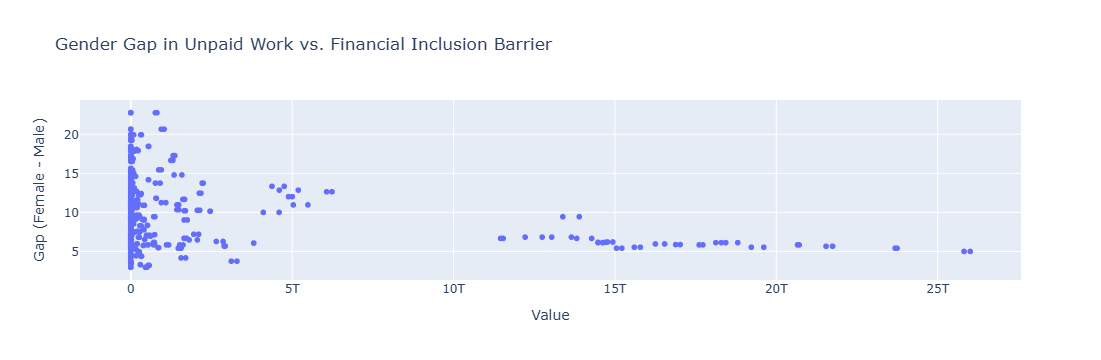

In [92]:
# Merge your gender gap dataset with this one using "Country Name" and "Year"
merged_df = pd.merge(pivot_df, contextual_df, on=["Country Name", "Year"], how="inner")

# Plot gap vs financial exclusion reason
import plotly.express as px
fig = px.scatter(merged_df,
                 x="Value",  # from contextual indicators
                 y="Gap (Female - Male)",  # from your gender gap data
                 hover_name="Country Name",
                 title="Gender Gap in Unpaid Work vs. Financial Inclusion Barrier")
fig.show()
